In [126]:
import importlib
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import utils
importlib.reload(utils)
import plot_utils
importlib.reload(plot_utils)

<module 'plot_utils' from '/home/finalProject/plot_utils.py'>

# Base Dataset

In [127]:
diabetes_dataset = MyPyTable()
diabetes_dataset.load_from_file("input_data/diabetes_prediction_dataset.csv")

diabetes_headers = diabetes_dataset.column_names
diabetes_data = diabetes_dataset.data

# Age Distribution

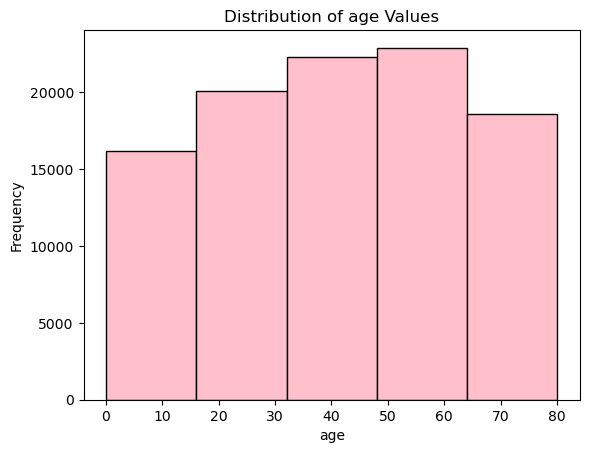

In [128]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "age", 5)

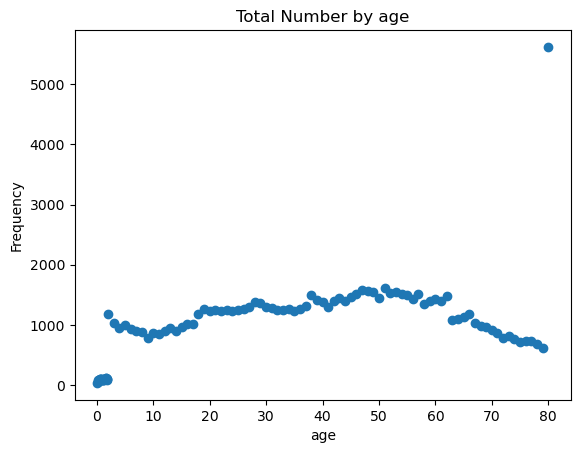

In [129]:
plot_utils.frequencies_scatter(diabetes_data, diabetes_headers, "age")

# Blood Glucose Level Distribution

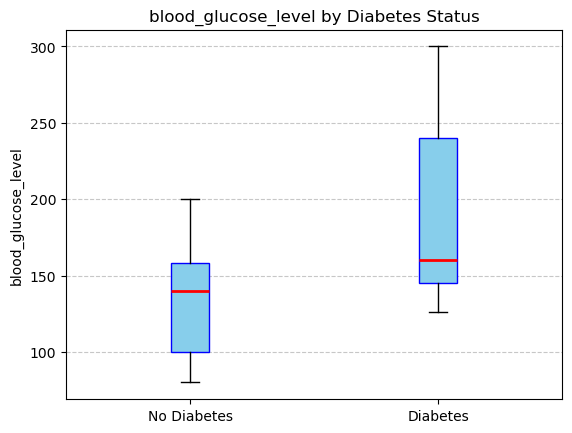

In [130]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "blood_glucose_level")

# Heart Disease

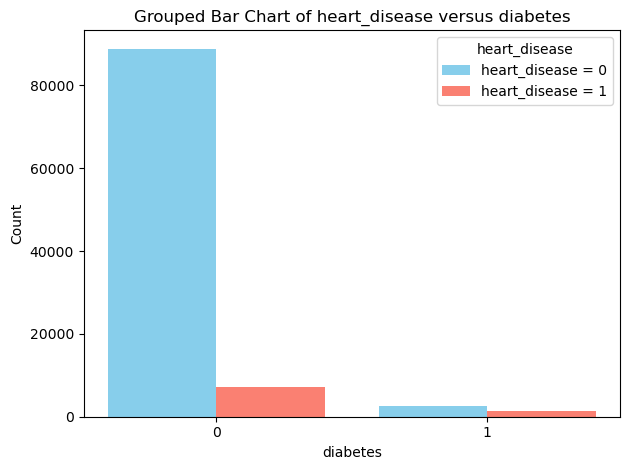

In [131]:
plot_utils.grouped_bar_chart(diabetes_data, diabetes_headers, "heart_disease")

# BMI

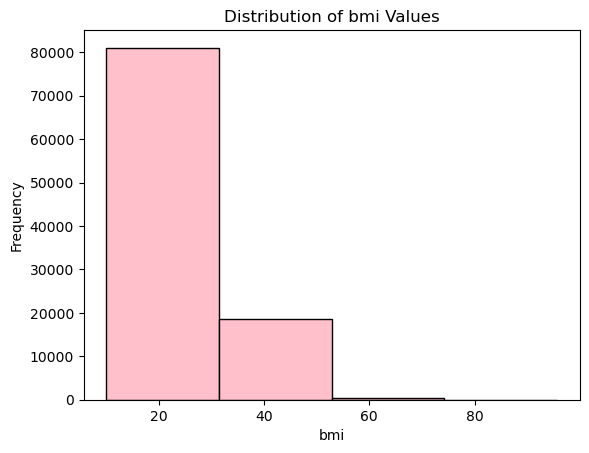

In [132]:
plot_utils.basic_histogram(diabetes_data, diabetes_headers, "bmi", 4)

# HbA1c Level

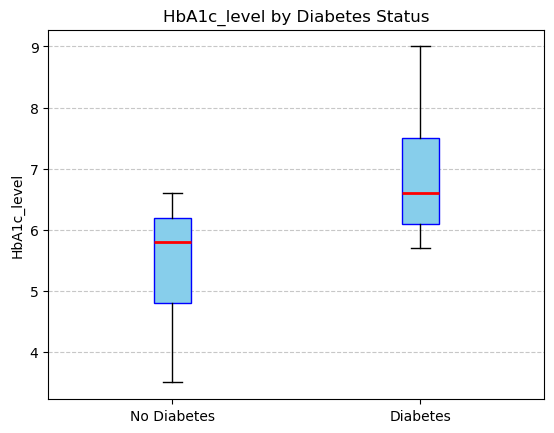

In [133]:
plot_utils.continuous_box_plt(diabetes_data, diabetes_headers, "HbA1c_level")

# Smoking History

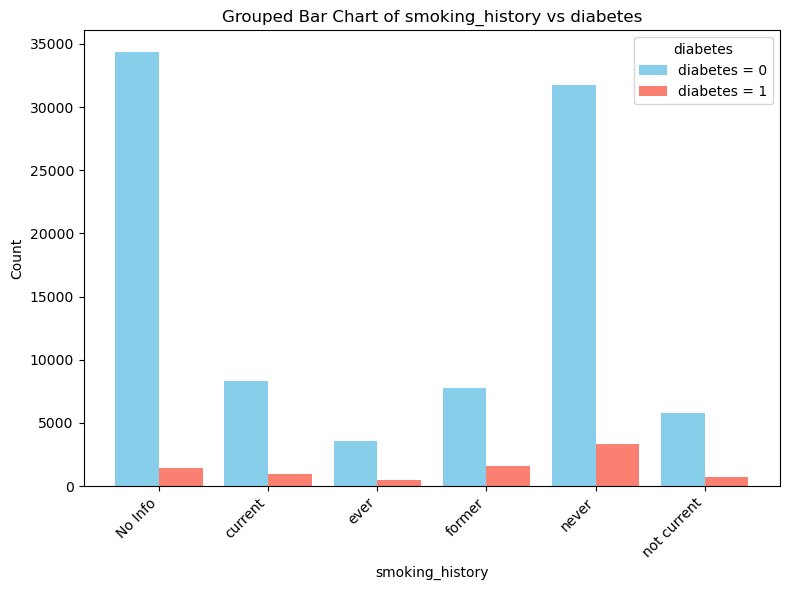

In [134]:
plot_utils.categorical_vs_binary_plt(diabetes_data, diabetes_headers, "smoking_history", "diabetes")